# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

### Credits:

- Udacity for providing a template to implement  functionality in stages which is required to successfully complete this project.
- LeNet model architecture by Yann LeCun, Director of AI Research at Facebook
- Image brightness augementation techniques by Vivek Yadav, Assistant Professor in Mechanical Engineering and Neurology

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

mapping = "signnames.csv"

import csv
with open(mapping, 'r') as f:
  reader = csv.reader(f)
  your_list = list(reader)

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

In [2]:
#Load Custom Test Data 
from scipy import misc
import numpy as np

sign1 = misc.imread('Signs/sign1.png', mode='RGB')
sign2 = misc.imread('Signs/sign2.jpg', mode='RGB')
sign3 = misc.imread('Signs/sign3.jpg', mode='RGB')
sign4 = misc.imread('Signs/sign4.jpg', mode='RGB')
sign5 = misc.imread('Signs/sign5.png', mode='RGB')

X_final_test = np.array([sign1, sign2, sign3, sign4, sign5])
print(X_final_test.shape)
X_final_original_test = X_final_test

y_final_test = np.array([17, 14, 14, 13, 22])
print(y_final_test.shape)    

(5, 32, 32, 3)
(5,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(your_list)-1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Split Training set to create a validation set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples.
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

print("Updated number of training examples =", n_train)
print("Updated number of validation examples =", n_validation)
print("Updated number of testing examples =", n_test)
print("Updated Image data shape =", image_shape)
print()

Updated number of training examples = 31367
Updated number of validation examples = 7842
Updated number of testing examples = 12630
Updated Image data shape = (32, 32, 3)



42


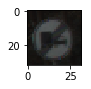

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

import cv2
import random
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))

plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1) Preprocess Data

A portion of the training dataset, is stored seperately as a validation dataset.

Data Preprocessing Techniques include:
- Random Shuffling the Data: to reduce bias to original order of training data
- Image normalization: to reduce bias on varying image contrast
    - This is done by deleting the mean of the image, and then diving by its standard deviation
          img = img - np.mean(img)
          img = img / np.std(img)
- Additional data is generated by augmenting the brightness of the images. Explain in next section.

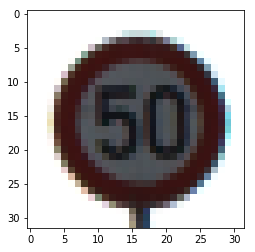

In [6]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

X_train_gen, y_train_gen = X_train, y_train

plt.imshow(X_train[10])

In [7]:
def normalize(img):
    img = img - np.mean(img)
    img = img / np.std(img)
    return img

In [8]:
#normalized the data set - leveraging basic preprocessing techniques

X_train = normalize(X_train[:,])
X_validation = normalize(X_validation[:,])
X_test_original = X_test
X_test = normalize(X_test[:,])
#X_validation = normalize(X_validation[:,:,:,])

(31367, 32, 32, 3)


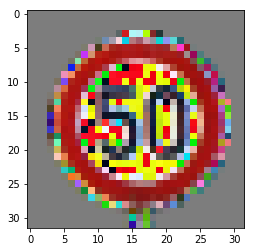

In [9]:
#Validate Image Shape
plt.imshow(X_train[10])
print(X_train.shape)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The original training dataset is split into training data and validation data by using train_test_split function from sklearn.model_selection library. 

- I first extracted 20% of training data as validation data:
    - Updated number of training examples = 31367
    - Updated number of validation examples = 7842

- I then generated additional training data by randomly augmenting the image brightness of original dataset. 
    - Why: to strengthen the model for images with different levels of brightness.
    - How: by randomly adjusting the brightness value of images in the HSV colorspace (using opencv)
    - I generated an equal amount of new training data and appended this to the existing dataset. 
    - Note: the additional dataset also undergoes preprocessing: normalization.
    - The key difference between the new dataset and existing dataset is the varying level of brightness.

In [31]:
#Generated additional data by randomly adjusting brightness of training data
#Leveraged image augement_brightness code from Medium post. Concanetated generated data with original data.

#Split the training data using 20% of it as validation dataset...code in In[4]

In [11]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

In [12]:
for i in range(len(X_train_gen)):
    X_train_gen[i] = augment_brightness_camera_images(X_train_gen[i])
    
X_train_gen = normalize(X_train_gen[:,])

In [13]:
X_train = np.concatenate((X_train, X_train_gen), axis=0)
y_train = np.concatenate((y_train, y_train_gen), axis=0)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

2) Setup Tensorflow and Batch Size

In [15]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

3) Type of model (Architecture): LeNet implementation

Input => Conv1 => ReLu => Dropout 75% => Conv2 => ReLu => Dropout 75% => Flatten => Fully Connected => Dropout 75% => Fully Connected => Dropout 75% => Fully Connected => Prediction


- Layer 1: Convolutional: The output shape should be 28x28x6. Activation: ReLu. Pooling: The output shape should be 14x14x6.

- Improve: Implement dropout @75% to reduce overfitting


- Layer 2: Convolutional: The output shape should be 10x10x16. Activation: ReLu. Pooling: The output shape should be 5x5x16.

- Improve: Implement dropout @75% to reduce overfitting


- Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten.


- Layer 3: Fully Connected: This should have 120 outputs. Activation: ReLu.

- Improve: Implement dropout @75% to reduce overfitting


- Layer 4: Fully Connected: This should have 84 outputs. Activation: ReLu.

- Improve: Implement dropout @75% to reduce overfitting


- Layer 5: Fully Connected (Logits): This should have 43 outputs.


In [16]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')    
    
    #IMPROVE: Dropout 
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #IMPROVE: Dropout 
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    #IMPROVE: Dropout 
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    #IMPROVE: Dropout 
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

4) Features and Labels

In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32) # probability to keep units

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Type of optimizer: Adam optimizer

Batch size: 128

Epochs: 30

Learning Rate: 0.001

Hyperparameters: Learning Rate, Batch Size, Dropout Parameter, Activation: fc2, relu, mu = 0, sigma = 0.1

5) Training Pipeline

In [18]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

6) Model Evaluation

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

7) Train the Model

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
        
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.802

EPOCH 2 ...
Validation Accuracy = 0.912

EPOCH 3 ...
Validation Accuracy = 0.943

EPOCH 4 ...
Validation Accuracy = 0.958

EPOCH 5 ...
Validation Accuracy = 0.967

EPOCH 6 ...
Validation Accuracy = 0.971

EPOCH 7 ...
Validation Accuracy = 0.976

EPOCH 8 ...
Validation Accuracy = 0.979

EPOCH 9 ...
Validation Accuracy = 0.979

EPOCH 10 ...
Validation Accuracy = 0.981

EPOCH 11 ...
Validation Accuracy = 0.980

EPOCH 12 ...
Validation Accuracy = 0.986

EPOCH 13 ...
Validation Accuracy = 0.985

EPOCH 14 ...
Validation Accuracy = 0.987

EPOCH 15 ...
Validation Accuracy = 0.985

EPOCH 16 ...
Validation Accuracy = 0.986

EPOCH 17 ...
Validation Accuracy = 0.987

EPOCH 18 ...
Validation Accuracy = 0.986

EPOCH 19 ...
Validation Accuracy = 0.989

EPOCH 20 ...
Validation Accuracy = 0.990

EPOCH 21 ...
Validation Accuracy = 0.988

EPOCH 22 ...
Validation Accuracy = 0.988

EPOCH 23 ...
Validation Accuracy = 0.989

EPOCH 24 ...
Validation Accura

8) Evaluate the Model

In [21]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.956


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

This is a standard image classification problem. The lenet is a proven model for the same - and goes beyond a standard feedforward network. Thus I decided to leverage the lenet architecture; update activation layers to relu; then focus on removing overfitting by using dropout.

- Why Adam: firstly, cause it is a very popular stochastic gradient optimizer. Also the training cost over multiple iterations of a dataset are least for adam when implemented with Relu AND and dropout regularization. Hence making it a very efficient optimizer compared to AdaGrad and RMSProp

- Convolutional layer is well suited for this problem: ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network. Since we are dealing with Images in this problem I choose to go with Convolutional layers. 

- Why ReLu: ReLu is it poses a reduced likelihood of the gradient to vanish, and also offers sparsity (or less dense network) when compared to sigmoid - hence offering speed. 

- Tuning hyperparameter: 
  - starting with setting a low learning rate of 0.001; which was offered to the adam optimizer; and then changing from sigmoid to ReLu. I stuck with these settings.
  - I chose the standard LeNet architecture to get the layer size, number of neurons, etc.
  - Added dropouts to reduce overfitting of model. And played with dropout values.


To improve accuracy of model in different brightness cases I then focussed on generating additional test data. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [23]:
#label description defination copied from github forum

def load_label_file(file):
    lines = open(file).readlines()[1:]
    lines = [line.strip().split(",") for line in lines]
    label_descs = dict([ (int(classid), desc) for classid, desc in lines])
    return label_descs

label_descriptions = load_label_file("signnames.csv")

In [24]:
print(label_descriptions)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

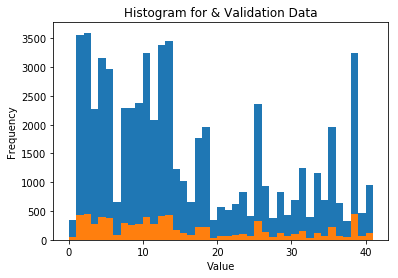

In [33]:
#Histogram for training & validation data

plt.hist(y_train, bins=list(range(0, 42)))
plt.title("Histogram for Training & Validation Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.hist(y_validation, bins=list(range(0, 42)))
plt.title("Histogram for & Validation Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The fourth image (Turn left ahead) has a bright orange object on the right in the background. Otherwise the rest seem relatively simple or similar to the remaining training dataset. 

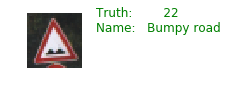

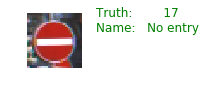

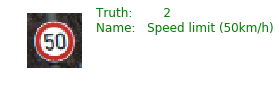

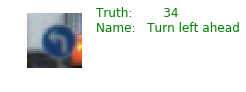

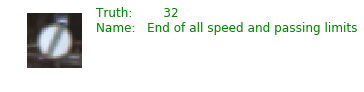

In [26]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Pick 5  images
sample_indexes = [500, 1000, 1500, 2000, 2500]
y_truth = []

for img in sample_indexes:
    y_truth.append(y_test[img])

fig = plt.figure(figsize=(10, 10))
intCount = 0
for image in sample_indexes:
    plt.figure(figsize=(1,1))
    plt.axis('off')
    color='green'
    plt.text(40, 10, "Truth:        {0}\nName:   {1}".format(y_test[image], label_descriptions.get(y_test[image])), 
             fontsize=12, color=color)
    
    plt.imshow(X_test_original[image])
    
    intCount += 1

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

- Captured Image Test Accuracy = 60% vs. Test Evaluation Accuracy = 95.6%. Here the third and fifth images are predicted incorrectly and hence the model did not work well in real world scenarious. The possible reasons could be:

    - Wrong predction for Third image: the actual road sign has of lower resolution (as it captures a smaller portion of the test image). The image also looks jittery. Improving model and image augmentation techniques should help in this scenario.

    - Wrong prediction for Fifth image: model is probably confused due to the large white colored board present under the road sign (probably cause the feature representing the road bump is jittered). Hence the an image segmentation piece might improve the model.

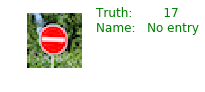

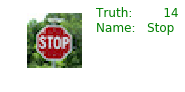

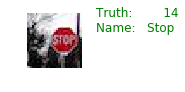

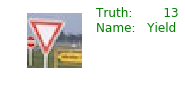

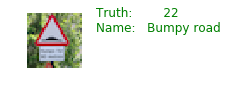

In [27]:
# Pick 5  images
sample_indexes = [0, 1, 2, 3, 4]
y_truth = []

for img in sample_indexes:
    y_truth.append(y_final_test[img])

fig = plt.figure(figsize=(10, 10))
intCount = 0

for image in sample_indexes:
    plt.figure(figsize=(1,1))
    plt.axis('off')
    color='green'
    plt.text(40, 10, "Truth:        {0}\nName:   {1}".format(y_final_test[image], label_descriptions.get(y_final_test[image])), 
             fontsize=12, color=color)
    
    plt.imshow(X_final_original_test[image])
    
    intCount += 1

In [28]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
X_final_test = normalize(X_final_test[:,])

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_final_test, y_final_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.600


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [29]:
# Raw Logits

with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    raw_logits_result = sess.run(logits, feed_dict={x: X_final_test, keep_prob: 1.0})
    
    top_k = tf.nn.top_k(logits, k=5)
    top_k_result = sess.run(top_k, feed_dict={x: X_final_test, keep_prob: 1.0})
    
    softmax_logits = tf.nn.softmax(logits)
    softmax_logits_result = sess.run(softmax_logits, feed_dict={x: X_final_test, keep_prob: 1.0})
    
    topk_softmax = tf.nn.top_k(softmax_logits, k = 5)
    topk_softmax_result = sess.run(topk_softmax, feed_dict={x: X_final_test, keep_prob: 1.0})
    

print("Raw Logits:", raw_logits_result)
print("")
print("Top k Raw Logits:", top_k_result)
print("")
print("Softmax Logits:", softmax_logits_result)
print("")
print("Top k Softmax Logits:", topk_softmax_result)

Raw Logits: [[ -3.00469971e+01  -5.62755823e+00  -2.45216007e+01  -1.96254349e+01
   -2.49031124e+01  -1.31455889e+01  -3.64783440e+01  -2.14756241e+01
   -2.03997803e+01  -1.29205549e+00  -3.95860028e+00  -1.24185162e+01
    2.64201031e+01  -1.34597683e+01   2.60412846e+01  -1.79099064e+01
   -2.57082863e+01   3.57220993e+01  -2.22896309e+01  -5.34446335e+01
   -2.79999466e+01  -3.28239326e+01  -6.23138857e+00  -2.88122253e+01
   -7.57640381e+01  -1.91630211e+01  -2.35840340e+01  -7.18315201e+01
   -4.09924316e+01   2.59897798e-01  -1.75936089e+01  -4.70879440e+01
   -1.58057327e+01  -5.51169205e+01  -2.68248158e+01  -2.28459415e+01
   -4.03653526e+01  -5.65849915e+01  -1.06660318e+01  -5.89771461e+01
   -2.00875874e+01  -2.01363983e+01  -1.66402321e+01]
 [ -5.27901649e+00   1.91309601e-01  -2.70719242e+00  -4.42724037e+00
   -5.20459080e+00   1.84403509e-01  -2.06763458e+01  -6.24097157e+00
   -3.76834482e-01  -2.02932668e+00  -3.04345775e+00  -8.34262466e+00
   -8.21350574e-01  -5.7

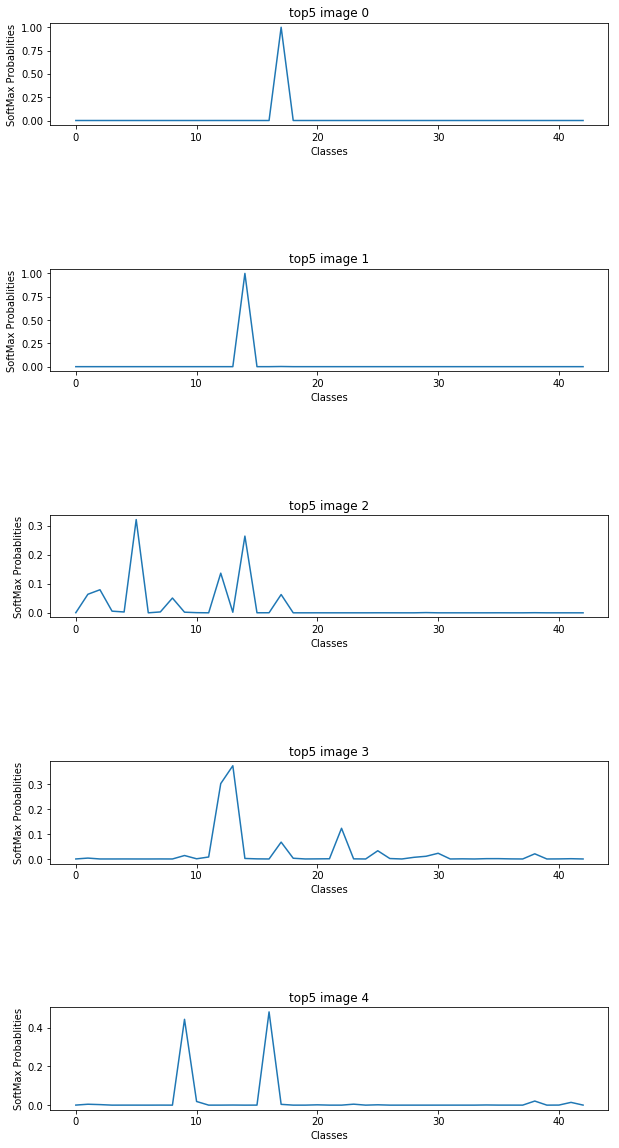

In [32]:
plt.figure(figsize=(10, 20))

plt.subplot(911)
plt.plot(softmax_logits_result[0])
plt.title("top5 image 0")
plt.xlabel("Classes")
plt.ylabel("SoftMax Probablities")

plt.subplot(913)
plt.plot(softmax_logits_result[1])
plt.title("top5 image 1")
plt.xlabel("Classes")
plt.ylabel("SoftMax Probablities")

plt.subplot(915)
plt.plot(softmax_logits_result[2])
plt.title("top5 image 2")
plt.xlabel("Classes")
plt.ylabel("SoftMax Probablities")

plt.subplot(917)
plt.plot(softmax_logits_result[3])
plt.title("top5 image 3")
plt.xlabel("Classes")
plt.ylabel("SoftMax Probablities")

plt.subplot(919)
plt.plot(softmax_logits_result[4])
plt.title("top5 image 4")
plt.xlabel("Classes")
plt.ylabel("SoftMax Probablities")

plt.show()

As seen in the soft_max probablities The classifier struggled in image 3, 4 and 5.

image 0: certain

image 1: certain

image 2: uncertain and wrong - image has odd contrast and looks jittery - need to investigate further, as this looks like a standard stop sign.

image 3: uncertain but accurate: also also detected the smaller sign in the background as top class 2. Proves that the model is working well here.

image 4: uncertain and wrong - model is probably confused due to the white box, model did not present the correct class in top 5 (probably cause the feature representing the road bump is jittered)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.